### 【TaskF】Basic practice of Clustering

- student id:111524019
- name：陳品蓁

#### 【Q1】請參考影片內容，對'College_Data.csv'這組資料集進行K-means演算法的實作
   ##### 1. 預處理：請將數據集中的類別項編碼為0/1，並將連續數值做標準化
   ##### 2. 請試著使用K-means演算法，將此組數據分成2個cluster，並試著以Scatter plot或其他視覺化方式呈現
   ##### hint: 請記得不要把字串帶入標準化的過程中

#### 【Q1】Please refer to the content of videos to implement K-Means on 'College_Data.csv' data. 
   ##### 1. Preprocessing: Please transfer the category item into 0/1, and standardize the continuous value.
   ##### 2. Please use K-Means to transfer the data into two clusters, and try to show it by scatter plot or other visualizations.
   ##### hint: Please don't add the String while doing standardization.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#匯入資料表
College_Data=pd.read_csv('College_Data.csv')
College_Data

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
College_Data.info()
#查看是否有遺漏值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   School       777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [4]:
College_Data.isna().sum()
#沒有遺漏值

School         0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [5]:
College_onehot=pd.get_dummies(College_Data[["Private"]])
College_onehot.head()
#以這個去標記0/1

,Private_No,Private_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [6]:
College_Data

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [7]:
College_drop=College_Data.drop(['School','Private'],axis=1)

In [8]:
College_drop = College_drop[np.isfinite(College_drop).all(1)]
College_drop 

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [9]:
College_Datanew=College_onehot.join(College_drop)
College_Datanew

,Private_No,Private_Yes,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,0,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,0,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,0,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,0,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,1,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,0,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,0,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,0,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [10]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(College_drop)
datamart_normalized =scaler.transform(College_drop)
datamart_normalized
#呈現正規化後的數值

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

In [28]:
from sklearn.cluster import KMeans


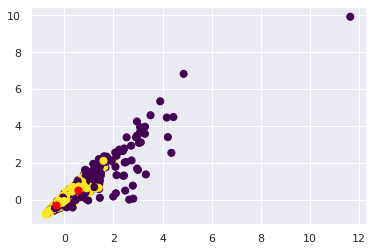

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs

kmeans=KMeans(n_clusters=2,random_state=1)
kmeans.fit(datamart_normalized) #建立分類
y_kmeans = kmeans.predict(datamart_normalized)

plt.scatter(datamart_normalized[:, 0], datamart_normalized[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_#找出據類中心
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)#把據類中心用紅點畫出來

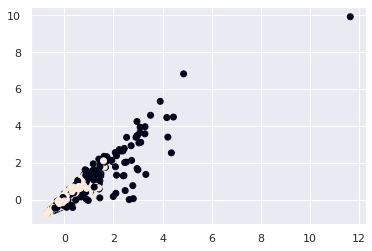

In [99]:
#另一種畫圖方式
kmeans=KMeans(n_clusters=2,random_state=1)
kmeans.fit(datamart_normalized)
kmeans.labels_ #這裡使用labels_就可以進行預測
plt.scatter(datamart_normalized[:, 0], datamart_normalized[:, 1], c=kmeans.labels_)
#C的參數放入kmeans.labels_

#### 【Q2】請接續Q1的結果，進行以下實作：
   ##### 1. 請找出最適合此數據集中最適合的cluster數量，並證明為何它是最適合的
   ##### 2.找出最洽當的cluster數量後，請觀察每組cluster來為cluster命名，並解釋你的理由
   ##### hint: 可利用groupby或其他視覺化圖形

#### 【Q2】Please follow the result of Q1 to do the following implementation
   ##### 1. Please find the most suitable clusters number for this data, and explain the reason
   ##### 2. After finding the most suitable clusters number, please observe each clusters and name it according to the characteristics of each cluster, otherwise, explain your reason.
   ##### hint: try to use groupby or other visualizations...

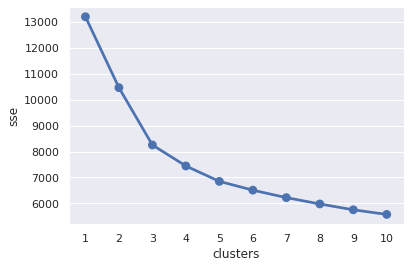

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt
sse={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k]=kmeans.inertia_

plt.xlabel("clusters")
plt.ylabel('sse')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()
#3折的角度最大 之後也趨於平緩

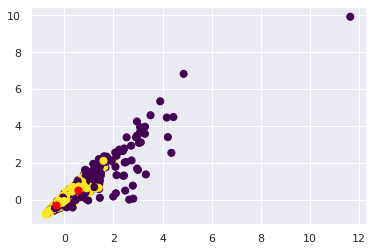

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs

kmeans=KMeans(n_clusters=2,random_state=1)
kmeans.fit(datamart_normalized)
y_kmeans = kmeans.predict(datamart_normalized)

plt.scatter(datamart_normalized[:, 0], datamart_normalized[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_ #找出據類中心

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)#把據類中心用紅點畫出來

#畫出clusters=2的分布圖形

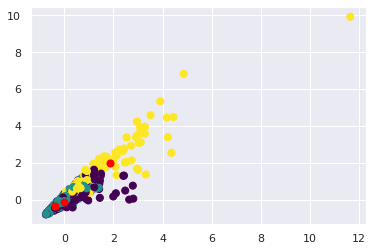

In [45]:
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(datamart_normalized)
y_kmeans = kmeans.predict(datamart_normalized)

plt.scatter(datamart_normalized[:, 0], datamart_normalized[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_#找出據類中心
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)#把據類中心用紅點畫出來
#畫出clusters=3的分布圖形

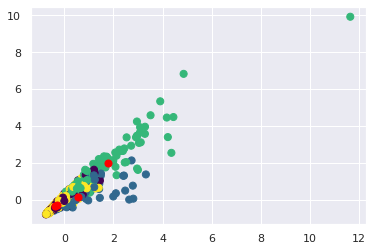

In [46]:
kmeans=KMeans(n_clusters=4,random_state=1)
kmeans.fit(datamart_normalized)
y_kmeans = kmeans.predict(datamart_normalized)

plt.scatter(datamart_normalized[:, 0], datamart_normalized[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_#找出據類中心
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)#把據類中心用紅點畫出來
#畫出clusters=4的分布圖形

300

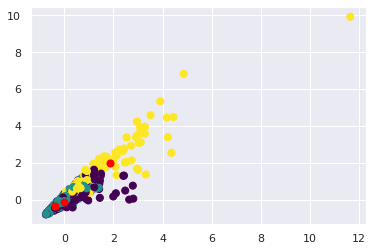

In [68]:
#以3為例為cluster
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(datamart_normalized)
y_kmeans = kmeans.predict(datamart_normalized)

plt.scatter(datamart_normalized[:, 0], datamart_normalized[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_#找出據類中心
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)#把據類中心用紅點畫出來
kmeans.max_iter

In [94]:
#以3為例為cluster的grouppby
datamart_rfm_k3 = College_Data.assign(Cluster =kmeans.labels_ )
datamart_rfm_k3.groupby(['Cluster']).agg({
    'Apps':['mean','min'],
    'Accept':['mean','min'],
    'Accept':['mean','min'],
    'Enroll':['mean','min'],
    'Top10perc':['mean','min'],
    'Top25perc':['mean','min'],
    'F.Undergrad':['mean','min'],
    'P.Undergrad':['mean','min'],
    'Outstate':['mean','min'],
    'Room.Board':['mean','min'],
    'Personal':['mean','min'],
    'PhD':['mean','min'],
    'Terminal':['mean','min'],
    'S.F.Ratio':['mean','min'],
    'perc.alumni':['mean','min'],
    'Expend':['mean','min'],
    'Grad.Rate':['mean','min'],
    
}).round(0)

#由此表可以發現第1類裡面通常在許多欄位裡面數值mean都是比較小的，
#但是最小值又可以發現是第0類通常會比較小，推測這兩類比較接近且偏小
#由散步圖也可以發現01類位置特別接近，散步的位置也在比較小的範圍

#第2類由散步圖還有數值都可以發現是裡面數值最大的，由圖片看點也是分布在較大數值位置
#而且分布範圍廣泛

Apps        Accept        Enroll       Top10perc     Top25perc  \
            mean   min    mean   min    mean   min      mean min      mean   
Cluster                                                                      
0         2867.0    81  1733.0    72   563.0    46      43.0   9      72.0   
1         1566.0   100  1134.0    90   467.0    35      18.0   1      45.0   
2        10121.0  3235  6939.0  2079  2826.0  1071      32.0   5      64.0   

             ... Terminal     S.F.Ratio      perc.alumni       Expend        \
        min  ...     mean min      mean  min        mean min     mean   min   
Cluster      ...                                                              
0        34  ...     91.0  61      12.0  3.0        33.0   6  13865.0  5716   
1         9  ...     72.0  24      15.0  2.0        19.0   0   7364.0  3186   
2        24  ...     90.0  73      16.0  8.0        15.0   3   9355.0  3605   

        Grad.Rate      
             mean min  
Cluster                
0            79.0  42  
1            59.0  15  
2            59.0  10  

[3 rows x 32 columns]

In [56]:
print(kmeans.labels_)
#每一個值 對應到預測是哪一群裡面

[1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 2 1 2 0 1 0 2 1 0 1 0 1 1 1 1 0
 0 1 2 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 2 0 2 1 0 0 1 1 1 1 2 0 0 0 1
 0 1 1 1 2 2 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0
 1 1 1 0 0 1 0 2 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 2 1 1 0 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 2 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 2 1 2 1 0 1 1 1 1 1 1 1 0 1 1 1 1 2 0 1 0
 2 2 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 2 0
 0 0 1 1 1 1 1 1 1 0 2 0 1 1 2 2 1 1 2 0 2 1 1 1 0 0 1 1 0 2 1 1 1 0 1 1 1
 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 2 1 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 1 1 0 1 0 2 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 2 2 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1
 2 1 0 1 1 2 1 0 1 1 1 2 2 2 1 1 1 0 1 1 1 0 0 0 0 2 0 1 1 2 1 1 1 2 0 1 0
 1 2 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 2 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0
 0 1 2 1 1 1 1 1 1 1 1 1 

In [95]:
#以School為分組依據
datamart_rfm_k3 = College_Data.assign(Cluster = 3)
datamart_rfm_k3.groupby(['School']).agg({
    'Apps':['mean','min'],
    'Accept':['mean','min'],
    'Accept':['mean','min'],
    'Enroll':['mean','min'],
    'Top10perc':['mean','min'],
    'Top25perc':['mean','min'],
    'F.Undergrad':['mean','min'],
    'P.Undergrad':['mean','min'],
    'Outstate':['mean','min'],
    'Room.Board':['mean','min'],
    'Personal':['mean','min'],
    'PhD':['mean','min'],
    'Terminal':['mean','min'],
    'S.F.Ratio':['mean','min'],
    'perc.alumni':['mean','min'],
    'Expend':['mean','min'],
    'Grad.Rate':['mean','min'],
    
}).round(0)



Apps        Accept       Enroll        \
                                 mean    min   mean   min   mean   min   
School                                                                   
Abilene Christian University     1660   1660   1232  1232    721   721   
Adelphi University               2186   2186   1924  1924    512   512   
Adrian College                   1428   1428   1097  1097    336   336   
Agnes Scott College               417    417    349   349    137   137   
Alaska Pacific University         193    193    146   146     55    55   
...                               ...    ...    ...   ...    ...   ...   
Worcester State College          2197   2197   1515  1515    543   543   
Xavier University                1959   1959   1805  1805    695   695   
Xavier University of Louisiana   2097   2097   1915  1915    695   695   
Yale University                 10705  10705   2453  2453   1317  1317   
York College of Pennsylvania     2989   2989   1855  1855    691   691   

                               Top10perc     Top25perc      ... Terminal      \
                                    mean min      mean min  ...     mean min   
School                                                      ...                
Abilene Christian University          23  23        52  52  ...       78  78   
Adelphi University                    16  16        29  29  ...       30  30   
Adrian College                        22  22        50  50  ...       66  66   
Agnes Scott College                   60  60        89  89  ...       97  97   
Alaska Pacific University             16  16        44  44  ...       72  72   
...                                  ...  ..       ...  ..  ...      ...  ..   
Worcester State College                4   4        26  26  ...       60  60   
Xavier University                     24  24        47  47  ...       75  75   
Xavier University of Louisiana        34  34        61  61  ...       75  75   
Yale University                       95  95        99  99  ...       96  96   
York College of Pennsylvania          28  28        63  63  ...       75  75   

                               S.F.Ratio       perc.alumni     Expend         \
                                    mean   min        mean min   mean    min   
School                                                                         
Abilene Christian University        18.0  18.0          12  12   7041   7041   
Adelphi University                  12.0  12.0          16  16  10527  10527   
Adrian College                      13.0  13.0          30  30   8735   8735   
Agnes Scott College                  8.0   8.0          37  37  19016  19016   
Alaska Pacific University           12.0  12.0           2   2  10922  10922   
...                                  ...   ...         ...  ..    ...    ...   
Worcester State College             21.0  21.0          14  14   4469   4469   
Xavier University                   13.0  13.0          31  31   9189   9189   
Xavier University of Louisiana      14.0  14.0          20  20   8323   8323   
Yale University                      6.0   6.0          49  49  40386  40386   
York College of Pennsylvania        18.0  18.0          28  28   4509   4509   

                               Grad.Rate      
                                    mean min  
School                                        
Abilene Christian University          60  60  
Adelphi University                    56  56  
Adrian College                        54  54  
Agnes Scott College                   59  59  
Alaska Pacific University             15  15  
...                                  ...  ..  
Worcester State College               40  40  
Xavier University                     83  83  
Xavier University of Louisiana        49  49  
Yale University                       99  99  
York College of Pennsylvania          99  99  

[777 rows x 32 columns]

In [96]:
#以Private為分組依據
datamart_rfm_k3 = College_Data.assign(Cluster = 3)
datamart_rfm_k3.groupby(['Private']).agg({
    'Apps':['mean','min'],
    'Accept':['mean','min'],
    'Accept':['mean','min'],
    'Enroll':['mean','min'],
    'Top10perc':['mean','min'],
    'Top25perc':['mean','min'],
    'F.Undergrad':['mean','min'],
    'P.Undergrad':['mean','min'],
    'Outstate':['mean','min'],
    'Room.Board':['mean','min'],
    'Personal':['mean','min'],
    'PhD':['mean','min'],
    'Terminal':['mean','min'],
    'S.F.Ratio':['mean','min'],
    'perc.alumni':['mean','min'],
    'Expend':['mean','min'],
    'Grad.Rate':['mean','min'],
}).round(0)

Apps       Accept       Enroll      Top10perc     Top25perc      \
           mean  min    mean  min    mean  min      mean min      mean min   
Private                                                                      
No       5730.0  233  3919.0  233  1641.0  153      23.0   1      53.0  12   
Yes      1978.0   81  1306.0   72   457.0   35      29.0   1      57.0   9   

         ... Terminal     S.F.Ratio      perc.alumni       Expend        \
         ...     mean min      mean  min        mean min     mean   min   
Private  ...                                                              
No       ...     83.0  33      17.0  7.0        14.0   0   7458.0  3605   
Yes      ...     79.0  24      13.0  2.0        26.0   2  10486.0  3186   

        Grad.Rate      
             mean min  
Private                
No           56.0  10  
Yes          69.0  15  

[2 rows x 32 columns]